In [2]:
import LightGraphs

In [27]:
function adHocNetwork_ba(n1::Int64, n2::Int64, μ::Int64, k1::Int64, k2::Int64)
    g1 = LightGraphs.barabasi_albert(n1,2*k1,k1);
    g2 = LightGraphs.barabasi_albert(n2,2*k2,k2);
    G = LightGraphs.SimpleGraph(n1+n2);
    # add all g1 edges
    for e in edges(g1)
        add_edge!(G, e.src, e.dst);
    end
    # add all g2 edges, accounting for shift in indeces
    for e in edges(g2)
        add_edge!(G, e.src+n1, e.dst+n1);
    end
    # add μ edges at random
    for i in 1:μ
        s = rand(1:n1);
        d = rand(n1+1:n1+n2);
        add_edge!(G, s, d);
    end
    return G
end

adHocNetwork_ba (generic function with 1 method)

In [28]:
G = adHocNetwork_ba(250,250,20,2,8);

In [30]:
evc = eigenvector_centrality(G);
kc = katz_centrality(G, 1e-4);

In [32]:
using Plots

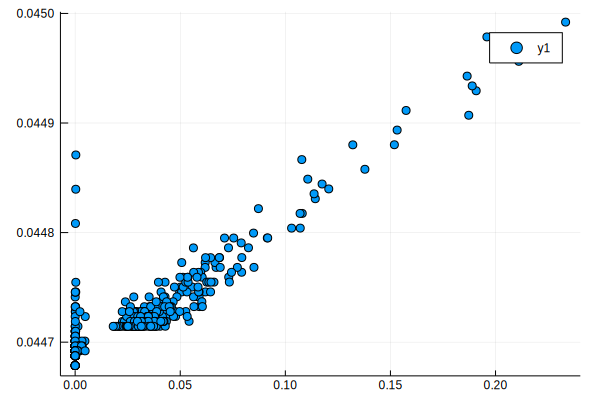

In [33]:
scatter(evc,kc)

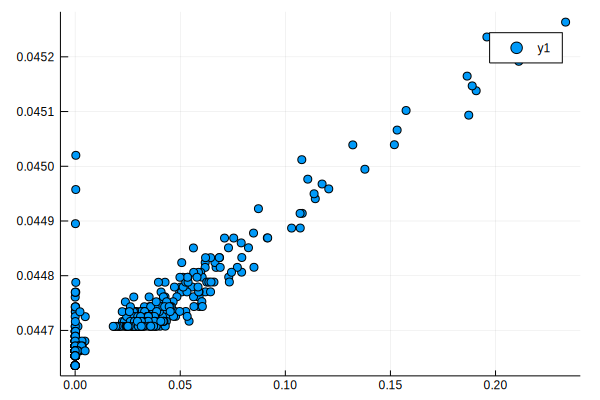

In [40]:
kc = katz_centrality(G, 2e-4)
scatter(evc,kc)

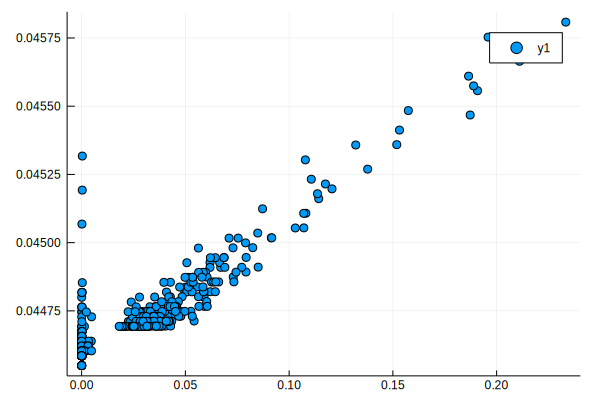

In [41]:
kc = katz_centrality(G,4e-4)
scatter(evc,kc)

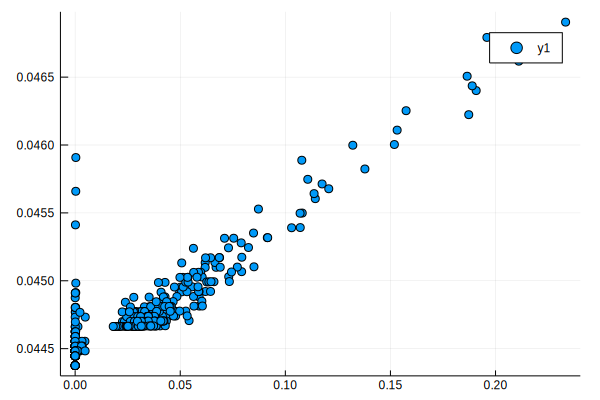

In [42]:
kc = katz_centrality(G, 8e-4)
scatter(evc,kc)

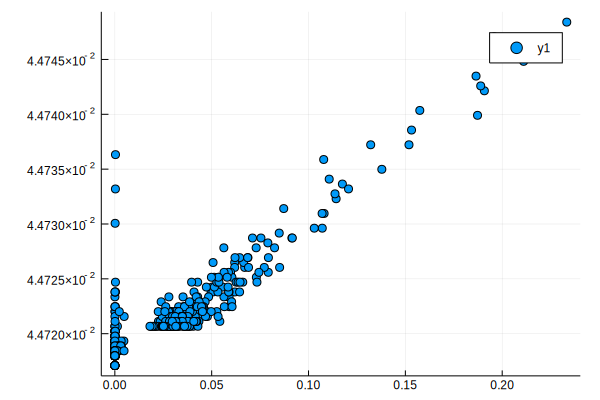

In [43]:
kc = katz_centrality(G, 1e-5)
scatter(evc,kc)